In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',None)

In [3]:
ipl_df = pd.read_csv(r"C:\Users\ANAIKUTTY\Documents\Cricket analysis\data files\ipl_2008_2024_ball_by_ball_data.csv")

In [4]:
df = ipl_df.copy()

In [5]:
df['isdot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
df['isone'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
df['istwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
df['isthree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
df['isfour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
df['issix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)

In [6]:
df[df['runs_off_bat'].isin([4,6])]['runs_off_bat'].count() / df['runs_off_bat'].count()

np.float64(0.16442204507128622)

In [7]:
df['phase'] = df['ball'].apply(lambda x:'powerplay' if x < 6 else ( 'middle' if x < 15 else 'death over'))

In [8]:
striker = list(df['striker'].unique())
non_striker = list(df['non_striker'].unique())
batting_team= list(df['batting_team'].unique())
bowling_team= list(df['bowling_team'].unique())
bowler= list(df['bowler'].unique())
venue= list(df['venue'].unique())
season= list(df['season'].unique())
phase = ['powerplay','middle','death over']
innings =[1,2]

In [10]:
def batting_analysis(bdf,
                     batsman=striker,
                     batsman1 = non_striker,
                     bowler = bowler,
                     batting_team = batting_team,
                     bowling_team = bowling_team,
                     venue = venue,
                     phase = phase,
                     season = season,
                     innings = innings
                     ):
    bdf = bdf[bdf['striker'].isin(batsman)]

    def batsman_overall_performance():

        bat_bdf = pd.DataFrame(bdf.groupby('striker').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        bat_bdf = bat_bdf.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})


        bat_bdf['RPI'] = bat_bdf['runs'] / bat_bdf['innings']
        bat_bdf['Average'] = np.where(bat_bdf['outs'] == 0,bat_bdf['runs'],bat_bdf['runs'] / bat_bdf['outs'])
        bat_bdf['StrikeRate'] = 100*bat_bdf['runs'] / bat_bdf['ball']
        bat_bdf['boundary_%'] = 100*((bat_bdf['four']*4)+(bat_bdf['six']*6) )/ bat_bdf['runs']
        bat_bdf['dot_%'] = 100*bat_bdf['dots'] / bat_bdf['ball']

        print('Overall Batsman Stats')
        print(bat_bdf)
        print('\n-----------\n')

    def batsman_innings_1():

        ing_1 = pd.DataFrame(bdf[bdf['innings'] == 1].groupby('striker').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        ing_1 = ing_1.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})

        ing_1['RPI'] = ing_1['runs'] / ing_1['innings']
        ing_1['Average'] = np.where(ing_1['outs'] == 0,ing_1['runs'],ing_1['runs'] / ing_1['outs'])
        ing_1['StrikeRate'] = 100*ing_1['runs'] / ing_1['ball']
        ing_1['boundary_%'] = 100*((ing_1['four']*4)+(ing_1['six']*6) )/ ing_1['runs']
        ing_1['dot_%'] = 100*ing_1['dots'] / ing_1['ball']

        print('Innings 1\n',ing_1)
        print('\n-----------\n')  

    def batsman_innings_2():

        ing_2 = pd.DataFrame(bdf[bdf['innings'] == 2].groupby('striker').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        ing_2 = ing_2.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})

        ing_2['RPI'] = ing_2['runs'] / ing_2['innings']
        ing_2['Average'] = np.where(ing_2['outs'] == 0,ing_2['runs'],ing_2['runs'] / ing_2['outs'])
        ing_2['StrikeRate'] = 100*ing_2['runs'] / ing_2['ball']
        ing_2['boundary_%'] = 100*((ing_2['four']*4)+(ing_2['six']*6) )/ ing_2['runs']
        ing_2['dot_%'] = 100*ing_2['dots'] / ing_2['ball']

        print('Innings 2\n',ing_2)
        print('\n-----------\n')

    def batsman_phases():

        phase_bdf = pd.DataFrame(bdf.groupby('phase').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        phase_bdf = phase_bdf.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})


        phase_bdf['RPI'] = phase_bdf['runs'] / phase_bdf['innings']
        phase_bdf['Average'] = np.where(phase_bdf['outs'] == 0,phase_bdf['runs'],phase_bdf['runs'] / phase_bdf['outs'])
        phase_bdf['StrikeRate'] = 100*phase_bdf['runs'] / phase_bdf['ball']
        phase_bdf['boundary_%'] = 100*((phase_bdf['four']*4)+(phase_bdf['six']*6) )/ phase_bdf['runs']
        phase_bdf['dot_%'] = 100*phase_bdf['dots'] / phase_bdf['ball']

        print('phases\n',phase_bdf)
        print('\n-----------\n')

    def batsman_innings_phases():

        ing_phase_bdf = pd.DataFrame(bdf.groupby(['innings','phase']).agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        ing_phase_bdf = ing_phase_bdf.rename(columns= {'match_id':'no_of_innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})


        ing_phase_bdf['RPI'] = ing_phase_bdf['runs'] / ing_phase_bdf['no_of_innings']
        ing_phase_bdf['Average'] = np.where(ing_phase_bdf['outs'] == 0,ing_phase_bdf['runs'],ing_phase_bdf['runs'] / ing_phase_bdf['outs'])
        ing_phase_bdf['StrikeRate'] = 100*ing_phase_bdf['runs'] / ing_phase_bdf['ball']
        ing_phase_bdf['boundary_%'] = 100*((ing_phase_bdf['four']*4)+(ing_phase_bdf['six']*6) )/ ing_phase_bdf['runs']
        ing_phase_bdf['dot_%'] = 100*ing_phase_bdf['dots'] / ing_phase_bdf['ball']

        

        ing_phase_bdf_1 = ing_phase_bdf[ing_phase_bdf['innings'] == 1]
        ing_phase_bdf_2 = ing_phase_bdf[ing_phase_bdf['innings'] == 2]

        print('\n-----------\n')
        print('InningsPhases First Innings\n',ing_phase_bdf_1)
        print('\n-----------\n')
        print('InningsPhases Second Innings\n',ing_phase_bdf_2)
        print('\n-----------\n')


    def batsman_bowler():

        bowler_bdf = pd.DataFrame(bdf.groupby('bowler').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        bowler_bdf = bowler_bdf.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})
      
        bowler_bdf['RPI'] = bowler_bdf['runs'] / bowler_bdf['innings']
        bowler_bdf['Average'] = np.where(bowler_bdf['outs'] == 0,bowler_bdf['runs'],bowler_bdf['runs'] / bowler_bdf['outs'])
        bowler_bdf['StrikeRate'] = 100*bowler_bdf['runs'] / bowler_bdf['ball']
        bowler_bdf['boundary_%'] = 100*((bowler_bdf['four']*4)+(bowler_bdf['six']*6) )/ bowler_bdf['runs']
        bowler_bdf['dot_%'] = 100*bowler_bdf['dots'] / bowler_bdf['ball']

        print('Bowlers\n',bowler_bdf.sort_values(by='runs',ascending=False).head(25))
        print('\n-----------\n')

    def batsman_innings_bowler():

        ing_bowler_bdf = pd.DataFrame(bdf.groupby(['innings','bowler']).agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        ing_bowler_bdf = ing_bowler_bdf.rename(columns= {'match_id':'no_of_innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})
        ing_bowler_bdf = ing_bowler_bdf.sort_values(by=['innings','outs'],ascending=[1,0])

        ing_bowler_bdf['RPI'] = ing_bowler_bdf['runs'] / ing_bowler_bdf['no_of_innings']
        ing_bowler_bdf['Average'] = np.where(ing_bowler_bdf['outs'] == 0,ing_bowler_bdf['runs'],ing_bowler_bdf['runs'] / ing_bowler_bdf['outs'])
        ing_bowler_bdf['StrikeRate'] = 100*ing_bowler_bdf['runs'] / ing_bowler_bdf['ball']
        ing_bowler_bdf['boundary_%'] = 100*((ing_bowler_bdf['four']*4)+(ing_bowler_bdf['six']*6) )/ ing_bowler_bdf['runs']
        ing_bowler_bdf['dot_%'] = 100*ing_bowler_bdf['dots'] / ing_bowler_bdf['ball']

        ing_bowler_bdf_1 = ing_bowler_bdf[ing_bowler_bdf['innings'] == 1]
        ing_bowler_bdf_2 = ing_bowler_bdf[ing_bowler_bdf['innings'] == 2]

        print('\n-----------\n')
        print('Innings Wise Bowlers First Innings\n',ing_bowler_bdf_1.sort_values(by='runs',ascending=False).head(25))
        print('\n-----------\n')
        print('Innings Wise Bowlers Second Innings\n',ing_bowler_bdf_2.sort_values(by='runs',ascending=False).head(25))
        print('\n-----------\n')

    def batsman_opposition():

        opposition_bdf = pd.DataFrame(bdf.groupby('bowling_team').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        opposition_bdf = opposition_bdf.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})

        opposition_bdf['RPI'] = opposition_bdf['runs'] / opposition_bdf['innings']
        opposition_bdf['Average'] = np.where(opposition_bdf['outs'] == 0,opposition_bdf['runs'],opposition_bdf['runs'] / opposition_bdf['outs'])
        opposition_bdf['StrikeRate'] = 100*opposition_bdf['runs'] / opposition_bdf['ball']
        opposition_bdf['boundary_%'] = 100*((opposition_bdf['four']*4)+(opposition_bdf['six']*6) )/ opposition_bdf['runs']
        opposition_bdf['dot_%'] = 100*opposition_bdf['dots'] / opposition_bdf['ball']
        print('Opposition\n',opposition_bdf)
        print('\n-----------\n')

    def batsman_venue():

        venue_bdf = pd.DataFrame(bdf.groupby('venue').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        venue_bdf = venue_bdf.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})

        venue_bdf['RPI'] = venue_bdf['runs'] / venue_bdf['innings']
        venue_bdf['Average'] = np.where(venue_bdf['outs'] == 0,venue_bdf['runs'],venue_bdf['runs'] / venue_bdf['outs'])
        venue_bdf['StrikeRate'] = 100*venue_bdf['runs'] / venue_bdf['ball']
        venue_bdf['boundary_%'] = 100*((venue_bdf['four']*4)+(venue_bdf['six']*6) )/ venue_bdf['runs']
        venue_bdf['dot_%'] = 100*venue_bdf['dots'] / venue_bdf['ball']
        print('Venue\n',venue_bdf.sort_values(by='runs',ascending=False).head(10))
        print('\n-----------\n')

    def batsman_innings_venue():

        ing_venue_bdf = pd.DataFrame(bdf.groupby(['innings','venue']).agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        ing_venue_bdf = ing_venue_bdf.rename(columns= {'match_id':'no_of_innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})


        ing_venue_bdf['RPI'] = ing_venue_bdf['runs'] / ing_venue_bdf['no_of_innings']
        ing_venue_bdf['Average'] = np.where(ing_venue_bdf['outs'] == 0,ing_venue_bdf['runs'],ing_venue_bdf['runs'] / ing_venue_bdf['outs'])
        ing_venue_bdf['StrikeRate'] = 100*ing_venue_bdf['runs'] / ing_venue_bdf['ball']
        ing_venue_bdf['boundary_%'] = 100*((ing_venue_bdf['four']*4)+(ing_venue_bdf['six']*6) )/ ing_venue_bdf['runs']
        ing_venue_bdf['dot_%'] = 100*ing_venue_bdf['dots'] / ing_venue_bdf['ball']


        ing_venue_bdf_1= ing_venue_bdf[ing_venue_bdf['innings'] == 1]
        ing_venue_bdf_2 = ing_venue_bdf[ing_venue_bdf['innings'] == 2]

        print('\n-----------\n')
        print('Innings Wise Venue First Innings\n',ing_venue_bdf_1.sort_values(by='runs',ascending=False).head(10))
        print('\n-----------\n')
        print('Innings Wise Venue Second Innings\n',ing_venue_bdf_2.sort_values(by='runs',ascending=False).head(10))
        print('\n-----------\n')
        print('\n-----------\n')
    
 



In [11]:
batting_analysis(df,batsman=['MS Dhoni'])

In [19]:
def filter_batting_analysis(bdf,
                     batsman=striker,
                     batsman1 = non_striker,
                     bowler = bowler,
                     batting_team = batting_team,
                     bowling_team = bowling_team,
                     venue = venue,
                     phase = phase,
                     season = season,
                     innings = innings
                     ):
    bdf = bdf[bdf['striker'].isin(batsman)]
        
    bdf = bdf[bdf['non_striker'].isin(batsman1)]
    bdf = bdf[bdf['bowler'].isin(bowler)]
    bdf = bdf[bdf['batting_team'].isin(batting_team)]
    bdf = bdf[bdf['bowling_team'].isin(bowling_team)]
    bdf = bdf[bdf['venue'].isin(venue)]
    bdf = bdf[bdf['phase'].isin(phase)]
    bdf = bdf[bdf['season'].isin(season)]
    bdf = bdf[bdf['innings'].isin(innings)]

    def filter_batsman_overall_performance():

        bat_bdf = pd.DataFrame(bdf.groupby('striker').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        bat_bdf = bat_bdf.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})


        bat_bdf['RPI'] = bat_bdf['runs'] / bat_bdf['innings']
        bat_bdf['Average'] = np.where(bat_bdf['outs'] == 0,bat_bdf['runs'],bat_bdf['runs'] / bat_bdf['outs'])
        bat_bdf['StrikeRate'] = 100*bat_bdf['runs'] / bat_bdf['ball']
        bat_bdf['boundary_%'] = 100*((bat_bdf['four']*4)+(bat_bdf['six']*6) )/ bat_bdf['runs']
        bat_bdf['dot_%'] = 100*bat_bdf['dots'] / bat_bdf['ball']

        print('Overall Batsman Stats')
        print(bat_bdf)
        print('\n-----------\n')

        if len(batsman) >= 2:
            #Comparing Runs Barplot
            plt.figure(figsize=(8,4))
            sns.barplot(data=bat_bdf, x='striker' ,y='runs', width=.25)
            plt.title('Comapring Batsman by Runs')
            plt.xlabel(None)
            plt.ylabel('Runs')
            plt.show()

            #Comparing Strikerate Barplot

            plt.figure(figsize=(8,4))
            sns.barplot(data=bat_bdf, x='striker' ,y='StrikeRate', width=.25)
            plt.title('Comapring Batsman by StrikeRate')
            plt.xlabel(None)
            plt.show()

            #Comparing RPI and Average Barplot

            plt.figure(figsize=(4,4))
            bat_bdf_melted = bat_bdf.melt(id_vars='striker',value_vars=['RPI','Average'],var_name='Metric',value_name='Value')
            sns.barplot(data=bat_bdf_melted, x='striker', y='Value',hue='Metric',width=.25)
            plt.title('Comparing Batsman by Average')
            plt.legend()
            plt.show()

            #Comparing Boundary and Dot Scatter

            sns.scatterplot(data=bat_bdf, x='boundary_%',y='dot_%')
            for i in range(len(bat_bdf)):
                plt.text(bat_bdf['boundary_%'][i] ,bat_bdf['dot_%'][i] , bat_bdf['striker'][i])
            plt.title('Boundary % and Dot % by Batsman')
            plt.axvline(17,ls='--',color='grey')
            plt.axhline(40,ls='--',color='grey')
            plt.ylabel('Dot %')
            plt.xlabel('Boundary %')
            plt.show()

            #compare Four and Six Bar plot

            plt.figure(figsize=(4,4))
            bat_bdf_melted = bat_bdf.melt(id_vars='striker',value_vars=['four','six'],var_name='Metric',value_name='Value')
            sns.barplot(data=bat_bdf_melted, x='striker', y='Value',hue='Metric',width=.25)
            plt.title('Comparing Batsman by Four and Six')
            plt.xlabel(None)
            plt.ylabel(None)
            plt.show()



    
        
    def filter_batsman_innings_1():


        ing_1 = pd.DataFrame(bdf[bdf['innings'] == 1].groupby('striker').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
  

        ing_1 = ing_1.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})

        ing_1['RPI'] = ing_1['runs'] / ing_1['innings']
        ing_1['Average'] = np.where(ing_1['outs'] == 0,ing_1['runs'],ing_1['runs'] / ing_1['outs'])
        ing_1['StrikeRate'] = 100*ing_1['runs'] / ing_1['ball']
        ing_1['boundary_%'] = 100*((ing_1['four']*4)+(ing_1['six']*6) )/ ing_1['runs']
        ing_1['dot_%'] = 100*ing_1['dots'] / ing_1['ball']

        print('Innings 1\n',ing_1)
        print('\n-----------\n')  

        if len(batsman) >= 2:
            #Comparing Runs Barplot
            
            sns.barplot(data=ing_1, x='striker' ,y='runs', width=.25)
            plt.title('Comapring Batsman by Runs Innings 1')
            plt.xlabel(None)
            plt.ylabel('Runs')
            plt.show()

            #Comparing Strikerate Barplot

            
            sns.barplot(data=ing_1, x='striker' ,y='StrikeRate', width=.25)
            plt.title('Comapring Batsman by StrikeRate Innings 1')
            plt.xlabel(None)
            plt.show()

            #Comparing RPI and Average Barplot

            
            ing_1_melted = ing_1.melt(id_vars='striker',value_vars=['RPI','Average'],var_name='Metric',value_name='Value')
            sns.barplot(data=ing_1_melted, x='striker', y='Value',hue='Metric',width=.25)
            plt.title('Comparing Batsman by Average Innings 1')
            plt.show()

            #Comparing Boundary and Dot Scatter

            sns.scatterplot(data=ing_1, x='boundary_%',y='dot_%')
            for i in range(len(ing_1)):
                plt.text(ing_1['boundary_%'][i] ,ing_1['dot_%'][i] , ing_1['striker'][i])
            plt.title('Boundary % and Dot % by Batsman Innings 1')
            plt.ylabel('Dot %')
            plt.xlabel('Boundary %')
            plt.axvline(17,ls='--',color='grey')
            plt.axhline(40,ls='--',color='grey')
            plt.show()

            #compare Four and Six Bar plot

            
            ing_1_melted = ing_1.melt(id_vars='striker',value_vars=['four','six'],var_name='Metric',value_name='Value')
            sns.barplot(data=ing_1_melted, x='striker', y='Value',hue='Metric',width=.25)
            plt.title('Comparing Batsman by Four and Six Innings 1')
            plt.xlabel(None)
            plt.ylabel(None)
            plt.show()


    def filter_batsman_innings_2():

        ing_2 = pd.DataFrame(bdf[bdf['innings'] == 2].groupby('striker').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        
      
        
        ing_2 = ing_2.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})

        ing_2['RPI'] = ing_2['runs'] / ing_2['innings']
        ing_2['Average'] = np.where(ing_2['outs'] == 0,ing_2['runs'],ing_2['runs'] / ing_2['outs'])
        ing_2['StrikeRate'] = 100*ing_2['runs'] / ing_2['ball']
        ing_2['boundary_%'] = 100*((ing_2['four']*4)+(ing_2['six']*6) )/ ing_2['runs']
        ing_2['dot_%'] = 100*ing_2['dots'] / ing_2['ball']

        print('Innings 2\n',ing_2)
        print('\n-----------\n')

        if len(batsman) >= 2:
            #Comparing Runs Barplot
            
            sns.barplot(data=ing_2, x='striker' ,y='runs', width=.25)
            plt.title('Comapring Batsman by Runs Innings 2')
            plt.xlabel(None)
            plt.ylabel('Runs')
            plt.show()

            #Comparing Strikerate Barplot

            
            sns.barplot(data=ing_2, x='striker' ,y='StrikeRate', width=.25)
            plt.title('Comapring Batsman by StrikeRate Innings 2')
            plt.xlabel(None)
            plt.show()

            #Comparing RPI and Average Barplot

            
            ing_2_melted = ing_2.melt(id_vars='striker',value_vars=['RPI','Average'],var_name='Metric',value_name='Value')
            sns.barplot(data=ing_2_melted, x='striker', y='Value',hue='Metric',width=.25)
            plt.title('Comparing Batsman by Average Innings 2')
            plt.show()

            #Comparing Boundary and Dot Scatter

            sns.scatterplot(data=ing_2, x='boundary_%',y='dot_%')
            for i in range(len(ing_2)):
                plt.text(ing_2['boundary_%'][i] ,ing_2['dot_%'][i] , ing_2['striker'][i])
            plt.title('Boundary % and Dot % by Batsman Innings 2')
            plt.ylabel('Dot %')
            plt.xlabel('Boundary %')
            plt.axvline(17,ls='--',color='grey')
            plt.axhline(40,ls='--',color='grey')
            plt.show()

            #compare Four and Six Bar plot

            
            ing_2_melted = ing_2.melt(id_vars='striker',value_vars=['four','six'],var_name='Metric',value_name='Value')
            sns.barplot(data=ing_2_melted, x='striker', y='Value',hue='Metric',width=.25)
            plt.title('Comparing Batsman by Four and Six Innings 2')
            plt.xlabel(None)
            plt.ylabel(None)
            plt.show()

    def filter_batsman_phases():
        
            phase_bdf = pd.DataFrame(bdf.groupby('phase').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
            
        

            phase_bdf = phase_bdf.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})
            phase_bdf = phase_bdf.sort_values(by='phase',ascending=False)

            phase_bdf['RPI'] = phase_bdf['runs'] / phase_bdf['innings']
            phase_bdf['Average'] = np.where(phase_bdf['outs'] == 0,phase_bdf['runs'],phase_bdf['runs'] / phase_bdf['outs'])
            phase_bdf['StrikeRate'] = 100*phase_bdf['runs'] / phase_bdf['ball']
            phase_bdf['boundary_%'] = 100*((phase_bdf['four']*4)+(phase_bdf['six']*6) )/ phase_bdf['runs']
            phase_bdf['dot_%'] = 100*phase_bdf['dots'] / phase_bdf['ball']

            phase_bdf = phase_bdf.sort_values(by='phase',ascending=False)
            print('phases\n',phase_bdf)
            print('\n-----------\n')

            if len(batsman) == 1:

                #Comparing Runs Barplot

                
                sns.barplot(data=phase_bdf, x='phase' ,y='runs', width=.25)
                plt.title('Runs by Phases ')
                plt.xlabel(None)
                plt.ylabel('Runs')
                plt.show()

                  #Comparing Strikerate Barplot

                
                sns.barplot(data=phase_bdf, x='phase' ,y='StrikeRate', width=.25)
                plt.title('Comapring Batsman by Phases')
                plt.xlabel(None)
                plt.show()

                #Comparing RPI and Average Barplot
                    
                
                phase_bdf_melted = phase_bdf.melt(id_vars='phase',value_vars=['RPI','Average'],var_name='Metric',value_name='Value')
                sns.barplot(data=phase_bdf_melted, x='phase', y='Value',hue='Metric')
                plt.title('RPI and Average by Phases')
                plt.show()

                #Comparing Boundary and Dot Scatter


                sns.scatterplot(data=phase_bdf, x='StrikeRate',y='dot_%')
                for i in range(len(phase_bdf)):
                    plt.text(phase_bdf['StrikeRate'][i] +1,phase_bdf['dot_%'][i] -1, phase_bdf['phase'][i])
                plt.title('Strike Rate and Dot\%\ by Phases')
                plt.show()

                #compare Four and Six Bar plot

                
                phases_bdf_melted = phase_bdf.melt(id_vars='phase',value_vars=['four','six'],var_name='Metric',value_name='Value')
                sns.barplot(data=phase_bdf_melted, x='phase', y='Value',hue='Metric',width=.25)
                plt.title('Comparing Batsman by Four and Six Phases')
                plt.xlabel(None)
                plt.ylabel(None)
                plt.show()
            
    def filter_batsman_innings_phases():
        
            ing_phase_bdf = pd.DataFrame(bdf.groupby(['innings','phase']).agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()

            
            ing_phase_bdf = ing_phase_bdf.rename(columns= {'match_id':'no_of_innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})


            ing_phase_bdf['RPI'] = ing_phase_bdf['runs'] / ing_phase_bdf['no_of_innings']
            ing_phase_bdf['Average'] = np.where(ing_phase_bdf['outs'] == 0,ing_phase_bdf['runs'],ing_phase_bdf['runs'] / ing_phase_bdf['outs'])
            ing_phase_bdf['StrikeRate'] = 100*ing_phase_bdf['runs'] / ing_phase_bdf['ball']
            ing_phase_bdf['boundary_%'] = 100*((ing_phase_bdf['four']*4)+(ing_phase_bdf['six']*6) )/ ing_phase_bdf['runs']
            ing_phase_bdf['dot_%'] = 100*ing_phase_bdf['dots'] / ing_phase_bdf['ball']

            

            ing_phase_bdf_1 = ing_phase_bdf[ing_phase_bdf['innings'] == 1]
            ing_phase_bdf_2 = ing_phase_bdf[ing_phase_bdf['innings'] == 2]
            ing_phase_bdf_1 = ing_phase_bdf_1.sort_values(by='phase',ascending=False)
            ing_phase_bdf_2 = ing_phase_bdf_2.sort_values(by='phase',ascending=False)

            
            print('\n-----------\n')
            print('InningsPhases First Innings\n',ing_phase_bdf_1.sort_values(by='phase',ascending=False))
            print('\n-----------\n')


            if len(batsman) == 1:

                #Comparing Runs Barplot

                
                sns.barplot(data=ing_phase_bdf_1, x='phase' ,y='runs', width=.25)
                plt.title('Runs by Phases (Innings 1) ')
                plt.xlabel(None)
                plt.ylabel('Runs')
                plt.show()

                  #Comparing Strikerate Barplot

                
                sns.barplot(data=ing_phase_bdf_1, x='phase' ,y='StrikeRate', width=.25)
                plt.title('Comapring Batsman by Phases (Innings 1)')
                plt.xlabel(None)
                plt.show()

                #Comparing RPI and Average Barplot
                    
                
                ing_phase_bdf_1_melted = ing_phase_bdf_1.melt(id_vars='phase',value_vars=['RPI','Average'],var_name='Metric',value_name='Value')
                sns.barplot(data=ing_phase_bdf_1_melted, x='phase', y='Value',hue='Metric')
                plt.title('RPI and Average by Phases (Innings 1)')
                plt.show()

                #Comparing Boundary and Dot Scatter


                sns.scatterplot(data=ing_phase_bdf_1, x='StrikeRate',y='dot_%')
                for i in range(len(ing_phase_bdf_1)):
                    plt.text(ing_phase_bdf_1['StrikeRate'][i] +1,ing_phase_bdf_1['dot_%'][i] -1, ing_phase_bdf_1['phase'][i])
                plt.title('Strike Rate and Dot\%\ by Phases (Innings 1)')
                plt.show()

                ''' sns.scatterplot(data=ing_phase_bdf_2, x='StrikeRate',y='dot_%')
                for i in range(len(ing_phase_bdf_2)):
                    plt.text(ing_phase_bdf_2['StrikeRate'][i] ,ing_phase_bdf_2['dot_%'][i] , ing_phase_bdf_2['phase'][i])
                plt.title('Strike Rate and Dot\%\ by Phases (Innings 2)')
                plt.show() '''


                #compare Four and Six Bar plot

                ing_phase_bdf_melted = ing_phase_bdf_1.melt(id_vars='phase',value_vars=['four','six'],var_name='Metric',value_name='Value')
                sns.barplot(data=ing_phase_bdf_1_melted, x='phase', y='Value',hue='Metric',width=.25)
                plt.title('Comparing Batsman by Four and Six Phases (Innings 1)')
                plt.xlabel(None)
                plt.ylabel(None)
                plt.show()

            
            print('InningsPhases Second Innings\n',ing_phase_bdf_2.sort_values(by='phase',ascending=False))
            print('\n-----------\n')

            if len(batsman) == 1:

                #Comparing Runs Barplot

                
                sns.barplot(data=ing_phase_bdf_2, x='phase' ,y='runs', width=.25)
                plt.title('Runs by Phases (Innings 2) ')
                plt.xlabel(None)
                plt.ylabel('Runs')
                plt.show()

                  #Comparing Strikerate Barplot

                
                sns.barplot(data=ing_phase_bdf_2, x='phase' ,y='StrikeRate', width=.25)
                plt.title('Comapring Batsman by Phases (Innings 2)')
                plt.xlabel(None)
                plt.show()

                #Comparing RPI and Average Barplot
                    
                
                ing_phase_bdf_2_melted = ing_phase_bdf_2.melt(id_vars='phase',value_vars=['RPI','Average'],var_name='Metric',value_name='Value')
                sns.barplot(data=ing_phase_bdf_2_melted, x='phase', y='Value',hue='Metric')
                plt.title('RPI and Average by Phases (Innings 2)')
                plt.show()

                #Comparing Boundary and Dot Scatter


                sns.scatterplot(data=ing_phase_bdf_2, x='StrikeRate',y='dot_%')
                plt.title('Strike Rate and Dot\%\ by Phases (Innings 2)')
                for i in range(len(ing_phase_bdf_2)):
                    plt.text(ing_phase_bdf_2['StrikeRate'].iloc[i] ,ing_phase_bdf_2['dot_%'].iloc[i] , ing_phase_bdf_2['phase'].iloc[i])
                
                plt.show()

                #compare Four and Six Bar plot

                
                ing_phase_bdf_melted = ing_phase_bdf_2.melt(id_vars='phase',value_vars=['four','six'],var_name='Metric',value_name='Value')
                sns.barplot(data=ing_phase_bdf_2_melted, x='phase', y='Value',hue='Metric',width=.25)
                plt.title('Comparing Batsman by Four and Six Phases (Innings 2)')
                plt.xlabel(None)
                plt.ylabel(None)
                plt.show()



    def filter_batsman_bowler():

        bowler_bdf = pd.DataFrame(bdf.groupby('bowler').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        
    
        
        bowler_bdf = bowler_bdf.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})
      
        bowler_bdf['RPI'] = bowler_bdf['runs'] / bowler_bdf['innings']
        bowler_bdf['Average'] = np.where(bowler_bdf['outs'] == 0,bowler_bdf['runs'],bowler_bdf['runs'] / bowler_bdf['outs'])
        bowler_bdf['StrikeRate'] = 100*bowler_bdf['runs'] / bowler_bdf['ball']
        bowler_bdf['boundary_%'] = 100*((bowler_bdf['four']*4)+(bowler_bdf['six']*6) )/ bowler_bdf['runs']
        bowler_bdf['dot_%'] = 100*bowler_bdf['dots'] / bowler_bdf['ball']

        bowler_bdf['bowl_average'] = np.where(bowler_bdf['outs']==0,bowler_bdf['runs'],bowler_bdf['runs'] / bowler_bdf['outs'])
        bowler_bdf['bowl_strikerate'] = np.where(bowler_bdf['outs']==0,bowler_bdf['ball'],bowler_bdf['runs'] / bowler_bdf['outs'])
        bowler_bdf['economy'] = 6*bowler_bdf['runs'] / bowler_bdf['ball']


        
        
        print('Bowlers\n',bowler_bdf)
        print('\n-----------\n')

    def filter_batsman_innings_bowler():


        

        ing_bowler_bdf = pd.DataFrame(bdf.groupby(['innings','bowler']).agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        ing_bowler_bdf = ing_bowler_bdf.rename(columns= {'match_id':'no_of_innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})
        ing_bowler_bdf = ing_bowler_bdf.sort_values(by=['innings','outs'],ascending=[1,0])

        ing_bowler_bdf['RPI'] = ing_bowler_bdf['runs'] / ing_bowler_bdf['no_of_innings']
        ing_bowler_bdf['Average'] = np.where(ing_bowler_bdf['outs'] == 0,ing_bowler_bdf['runs'],ing_bowler_bdf['runs'] / ing_bowler_bdf['outs'])
        ing_bowler_bdf['StrikeRate'] = 100*ing_bowler_bdf['runs'] / ing_bowler_bdf['ball']
        ing_bowler_bdf['boundary_%'] = 100*((ing_bowler_bdf['four']*4)+(ing_bowler_bdf['six']*6) )/ ing_bowler_bdf['runs']
        ing_bowler_bdf['dot_%'] = 100*ing_bowler_bdf['dots'] / ing_bowler_bdf['ball']

        ing_bowler_bdf['bowl_average'] = np.where(ing_bowler_bdf['outs']==0,ing_bowler_bdf['runs'],ing_bowler_bdf['runs'] / ing_bowler_bdf['outs'])
        ing_bowler_bdf['bowl_strikerate'] = np.where(ing_bowler_bdf['outs']==0,ing_bowler_bdf['ball'],ing_bowler_bdf['runs'] / ing_bowler_bdf['outs'])
        ing_bowler_bdf['economy'] = 6*ing_bowler_bdf['runs'] / ing_bowler_bdf['ball']

        ing_bowler_bdf_1 = ing_bowler_bdf[ing_bowler_bdf['innings'] == 1]
        ing_bowler_bdf_2 = ing_bowler_bdf[ing_bowler_bdf['innings'] == 2]

        print('\n-----------\n')
        print('Innings Wise Bowlers First Innings\n',ing_bowler_bdf_1)
        print('\n-----------\n')
        print('Innings Wise Bowlers Second Innings\n',ing_bowler_bdf_2)
        print('\n-----------\n')

    def filter_batsman_phase_bowler():


    

        bowler_phase_bdf = pd.DataFrame(bdf.groupby(['bowler','phase']).agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        bowler_phase_bdf = bowler_phase_bdf.rename(columns= {'match_id':'no_of_innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})
        

        bowler_phase_bdf['RPI'] = bowler_phase_bdf['runs'] / bowler_phase_bdf['no_of_innings']
        bowler_phase_bdf['Average'] = np.where(bowler_phase_bdf['outs'] == 0,bowler_phase_bdf['runs'],bowler_phase_bdf['runs'] / bowler_phase_bdf['outs'])
        bowler_phase_bdf['StrikeRate'] = 100*bowler_phase_bdf['runs'] / bowler_phase_bdf['ball']
        bowler_phase_bdf['boundary_%'] = 100*((bowler_phase_bdf['four']*4)+(bowler_phase_bdf['six']*6) )/ bowler_phase_bdf['runs']
        bowler_phase_bdf['dot_%'] = 100*bowler_phase_bdf['dots'] / bowler_phase_bdf['ball']

        bowler_phase_bdf['bowl_average'] = np.where(bowler_phase_bdf['outs']==0,bowler_phase_bdf['runs'],bowler_phase_bdf['runs'] / bowler_phase_bdf['outs'])
        bowler_phase_bdf['bowl_strikerate'] = np.where(bowler_phase_bdf['outs']==0,bowler_phase_bdf['ball'],bowler_phase_bdf['runs'] / bowler_phase_bdf['outs'])
        bowler_phase_bdf['economy'] = 6*bowler_phase_bdf['runs'] / bowler_phase_bdf['ball']

        print('Bowler Phase Wise\n',bowler_phase_bdf.sort_values(by=['bowler','phase'],ascending=False))
        print('\n-----------\n')



            
    def filter_batsman_opposition():



        opposition_bdf = pd.DataFrame(bdf.groupby('bowling_team').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        opposition_bdf = opposition_bdf.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})

        opposition_bdf['RPI'] = opposition_bdf['runs'] / opposition_bdf['innings']
        opposition_bdf['Average'] = np.where(opposition_bdf['outs'] == 0,opposition_bdf['runs'],opposition_bdf['runs'] / opposition_bdf['outs'])
        opposition_bdf['StrikeRate'] = 100*opposition_bdf['runs'] / opposition_bdf['ball']
        opposition_bdf['boundary_%'] = 100*((opposition_bdf['four']*4)+(opposition_bdf['six']*6) )/ opposition_bdf['runs']
        opposition_bdf['dot_%'] = 100*opposition_bdf['dots'] / opposition_bdf['ball']
        print('Opposition\n',opposition_bdf)
        print('\n-----------\n')

    def filter_batsman_venue():

        venue_bdf = pd.DataFrame(bdf.groupby('venue').agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        venue_bdf = venue_bdf.rename(columns= {'match_id':'innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})

        venue_bdf['RPI'] = venue_bdf['runs'] / venue_bdf['innings']
        venue_bdf['Average'] = np.where(venue_bdf['outs'] == 0,venue_bdf['runs'],venue_bdf['runs'] / venue_bdf['outs'])
        venue_bdf['StrikeRate'] = 100*venue_bdf['runs'] / venue_bdf['ball']
        venue_bdf['boundary_%'] = 100*((venue_bdf['four']*4)+(venue_bdf['six']*6) )/ venue_bdf['runs']
        venue_bdf['dot_%'] = 100*venue_bdf['dots'] / venue_bdf['ball']
        print('Venue\n',venue_bdf.sort_values(by='runs',ascending=False))
        print('\n-----------\n')

    def filter_batsman_innings_venue():

        ing_venue_bdf = pd.DataFrame(bdf.groupby(['innings','venue']).agg({'match_id':'nunique','runs_off_bat':'sum','ball':'count','player_dismissed':'count','isfour':'sum','issix':'sum','isdot':'sum'})).reset_index()
        ing_venue_bdf = ing_venue_bdf.rename(columns= {'match_id':'no_of_innings','runs_off_bat':'runs','player_dismissed':'outs','isfour':'four','issix':'six','isdot':'dots'})


        ing_venue_bdf['RPI'] = ing_venue_bdf['runs'] / ing_venue_bdf['no_of_innings']
        ing_venue_bdf['Average'] = np.where(ing_venue_bdf['outs'] == 0,ing_venue_bdf['runs'],ing_venue_bdf['runs'] / ing_venue_bdf['outs'])
        ing_venue_bdf['StrikeRate'] = 100*ing_venue_bdf['runs'] / ing_venue_bdf['ball']
        ing_venue_bdf['boundary_%'] = 100*((ing_venue_bdf['four']*4)+(ing_venue_bdf['six']*6) )/ ing_venue_bdf['runs']
        ing_venue_bdf['dot_%'] = 100*ing_venue_bdf['dots'] / ing_venue_bdf['ball']


        ing_venue_bdf_1= ing_venue_bdf[ing_venue_bdf['innings'] == 1]
        ing_venue_bdf_2 = ing_venue_bdf[ing_venue_bdf['innings'] == 2]

        print('\n-----------\n')
        print('Innings Wise Venue First Innings\n',ing_venue_bdf_1)
        print('\n-----------\n')
        print('Innings Wise Venue Second Innings\n',ing_venue_bdf_2)
        print('\n-----------\n')
    
    filter_batsman_overall_performance()
    filter_batsman_innings_1()
    filter_batsman_innings_2()
    filter_batsman_phases()
    filter_batsman_innings_phases()
    filter_batsman_bowler()
    filter_batsman_innings_bowler()
    filter_batsman_phase_bowler()
    filter_batsman_opposition()
    filter_batsman_venue()
    filter_batsman_innings_venue()

    



Overall Batsman Stats
    striker  innings  runs  ball  outs  four  six  dots      RPI    Average  StrikeRate  boundary_%      dot_%
0  MS Dhoni       51   436   295    11    31   24   107  8.54902  39.636364   147.79661    61.46789  36.271186

-----------

Innings 1
     striker  innings  runs  ball  outs  four  six  dots        RPI    Average  StrikeRate  boundary_%      dot_%
0  MS Dhoni       23   265   157     6    19   17    54  11.521739  44.166667  168.789809   67.169811  34.394904

-----------

Innings 2
     striker  innings  runs  ball  outs  four  six  dots       RPI  Average  StrikeRate  boundary_%      dot_%
0  MS Dhoni       28   171   138     5    12    7    53  6.107143     34.2  123.913043   52.631579  38.405797

-----------

phases
         phase  innings  runs  ball  outs  four  six  dots        RPI  Average  StrikeRate  boundary_%      dot_%
2   powerplay        3    12    15     0     2    0     9   4.000000     12.0   80.000000   66.666667  60.000000
1      middl

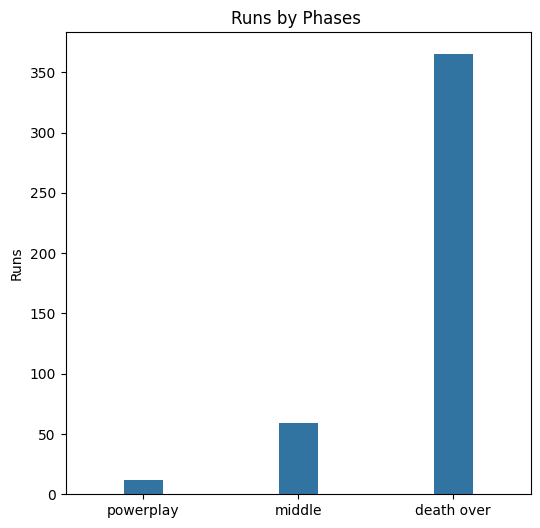

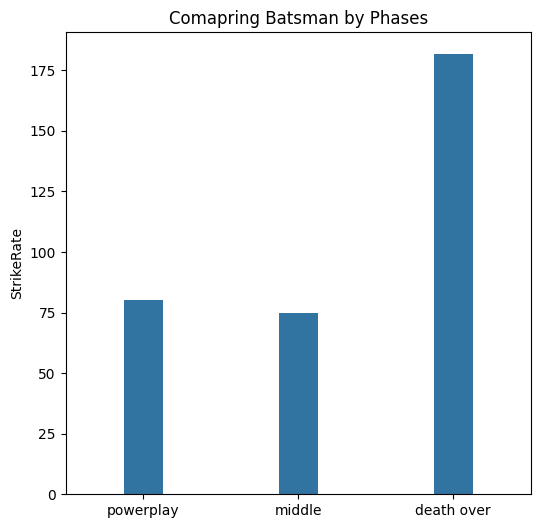

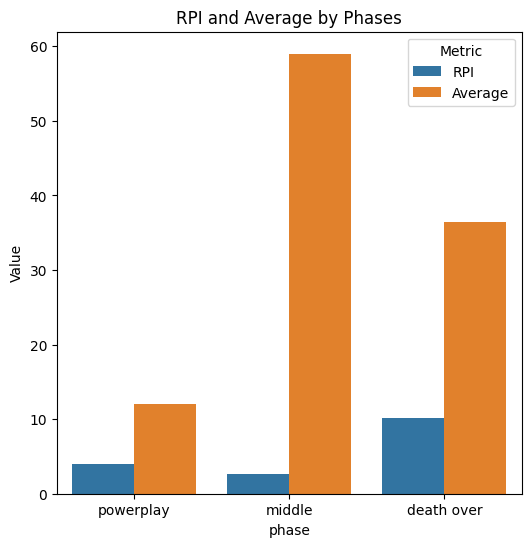

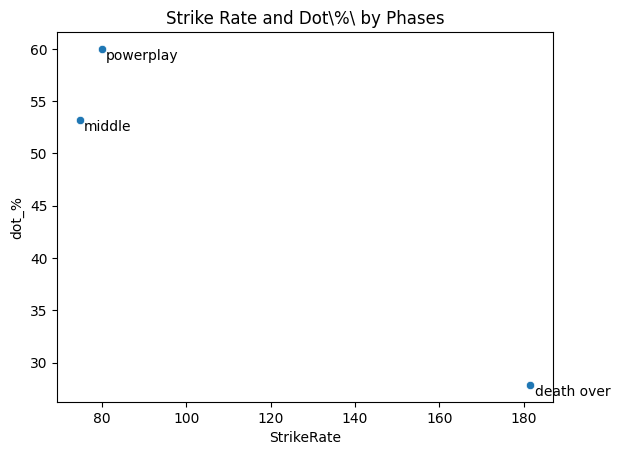

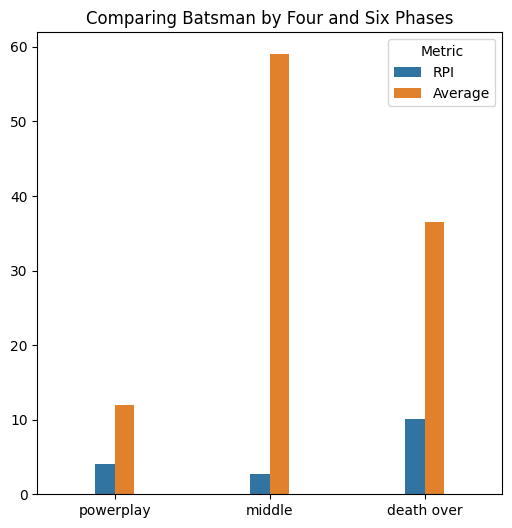


-----------

InningsPhases First Innings
    innings       phase  no_of_innings  runs  ball  outs  four  six  dots        RPI  Average  StrikeRate  boundary_%      dot_%
2        1   powerplay              2    12    10     0     2    0     4   6.000000     12.0  120.000000   66.666667  40.000000
1        1      middle             11    31    43     1     3    0    24   2.818182     31.0   72.093023   38.709677  55.813953
0        1  death over             16   222   104     5    14   17    26  13.875000     44.4  213.461538   71.171171  25.000000

-----------



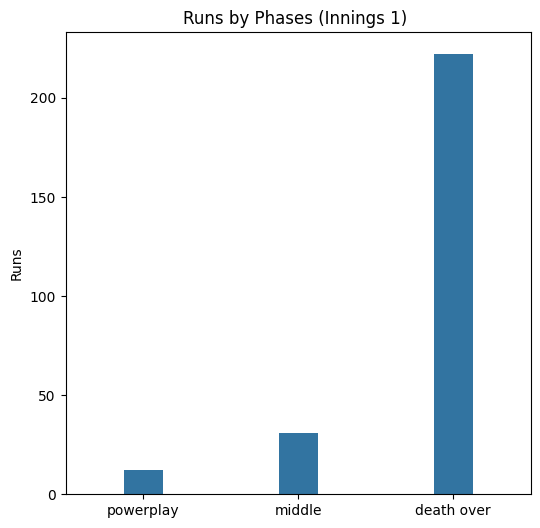

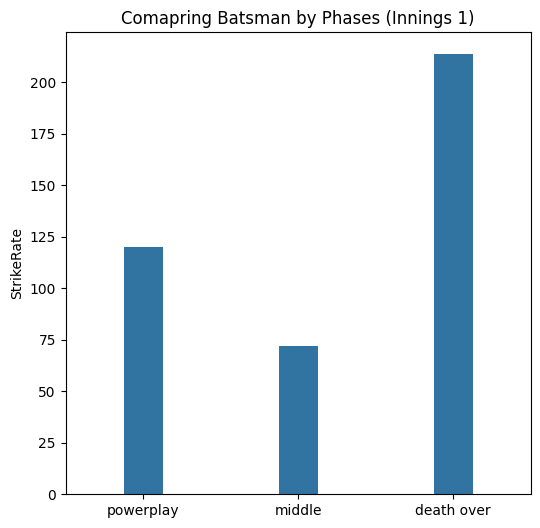

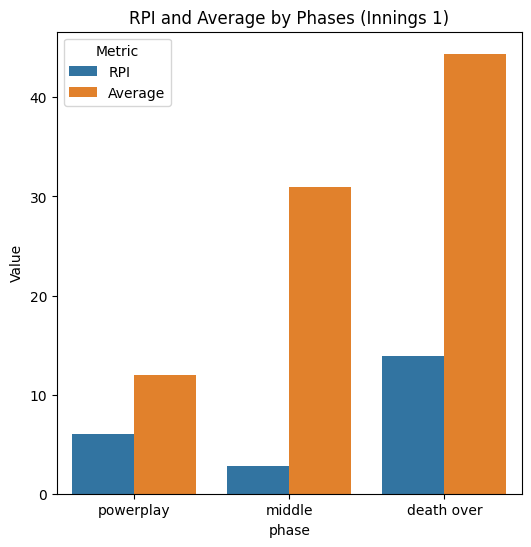

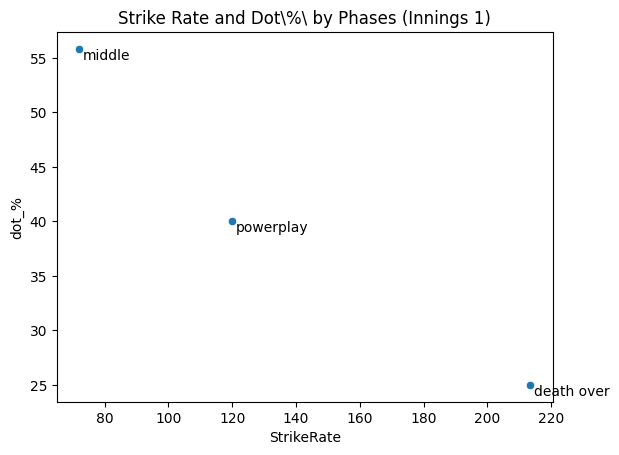

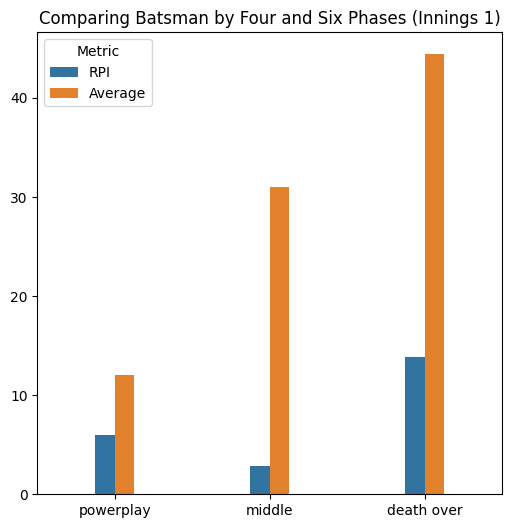

InningsPhases Second Innings
    innings       phase  no_of_innings  runs  ball  outs  four  six  dots       RPI  Average  StrikeRate  boundary_%       dot_%
5        2   powerplay              1     0     5     0     0    0     5  0.000000      0.0    0.000000         NaN  100.000000
4        2      middle             11    28    36     0     2    0    18  2.545455     28.0   77.777778   28.571429   50.000000
3        2  death over             20   143    97     5    10    7    30  7.150000     28.6  147.422680   57.342657   30.927835

-----------



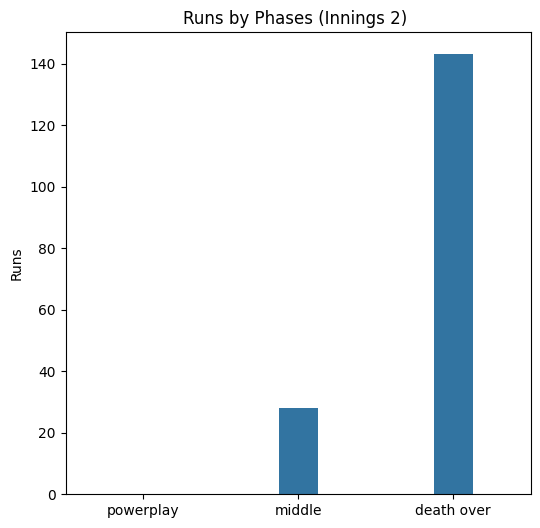

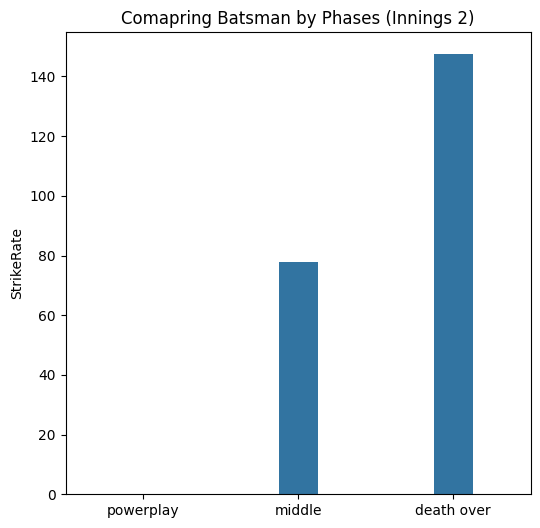

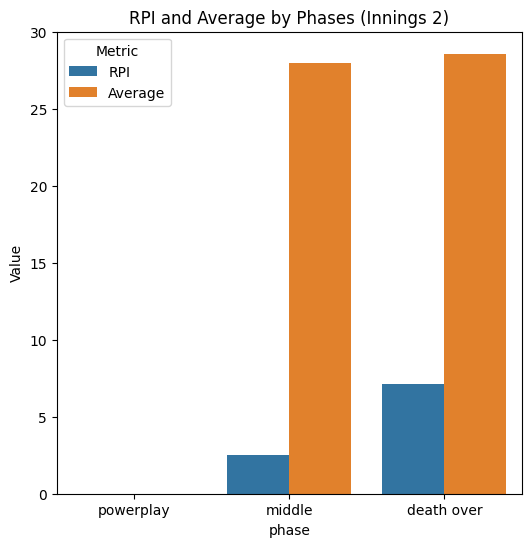

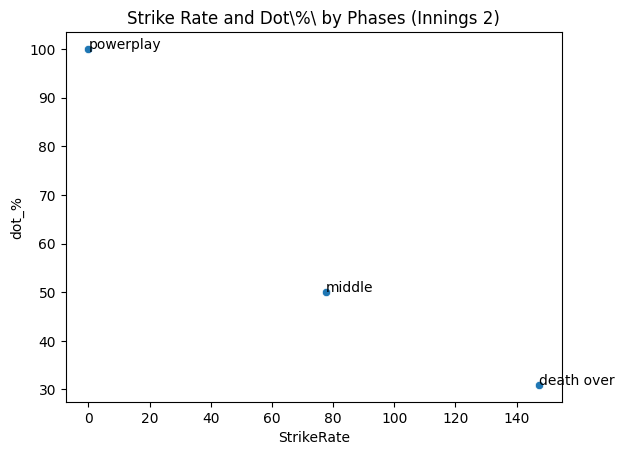

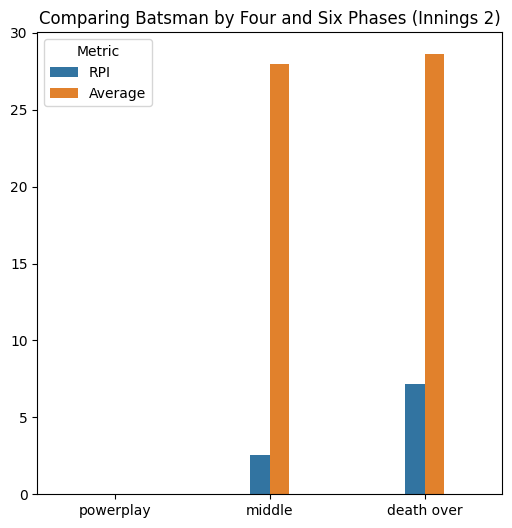

Bowlers
        bowler  innings  runs  ball  outs  four  six  dots        RPI    Average  StrikeRate  boundary_%      dot_%  bowl_average  bowl_strikerate    economy
0     B Kumar       11    94    61     0     7    5    21   8.545455  94.000000  154.098361   61.702128  34.426230     94.000000        61.000000   9.245902
1    DW Steyn        8   111    61     2     9    7    21  13.875000  55.500000  181.967213   70.270270  34.426230     55.500000        55.500000  10.918033
2   JJ Bumrah       15    60    64     4     3    2    29   4.000000  15.000000   93.750000   40.000000  45.312500     15.000000        15.000000   5.625000
3  SL Malinga       15    89    64     2     5    5    21   5.933333  44.500000  139.062500   56.179775  32.812500     44.500000        44.500000   8.343750
4    TA Boult        9    82    45     3     7    5    15   9.111111  27.333333  182.222222   70.731707  33.333333     27.333333        27.333333  10.933333

-----------


-----------

Innings Wise Bowlers 

In [13]:
filter_batting_analysis(df,batsman=['MS Dhoni'],bowler=['JJ Bumrah','SL Malinga','DW Steyn','B Kumar','TA Boult'])

Overall Batsman Stats
          striker  innings  runs  ball  outs  four  six  dots        RPI    Average  StrikeRate  boundary_%      dot_%
0  AB de Villiers      170  5162  3479   125   413  251  1113  30.364706  41.296000  148.375970   61.177838  31.991952
1        KL Rahul      122  4683  3572   104   400  187  1276  38.385246  45.028846  131.103024   58.125133  35.722284
2        MS Dhoni      228  5243  3947   149   363  252  1423  22.995614  35.187919  132.835065   56.532520  36.052698
3        S Dhawan      221  6769  5481   194   768  153  2134  30.628959  34.891753  123.499361   58.945191  38.934501
4         V Kohli      244  8004  6232   218   706  273  2198  32.803279  36.715596  128.433890   55.747126  35.269576

-----------



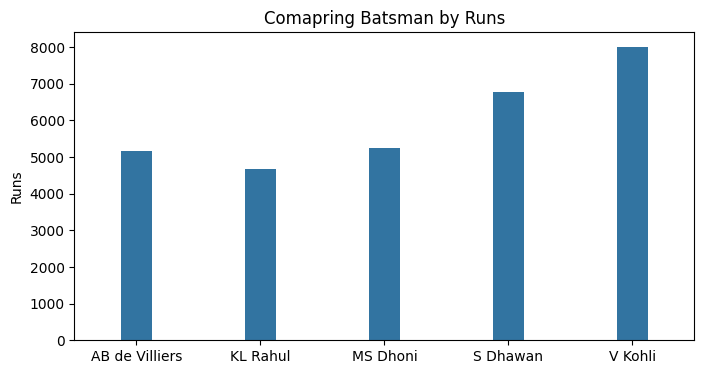

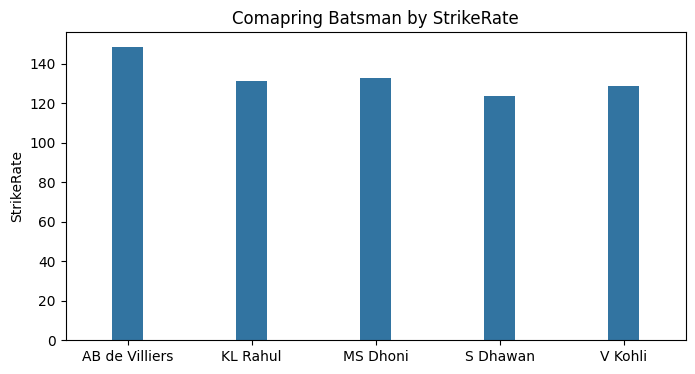

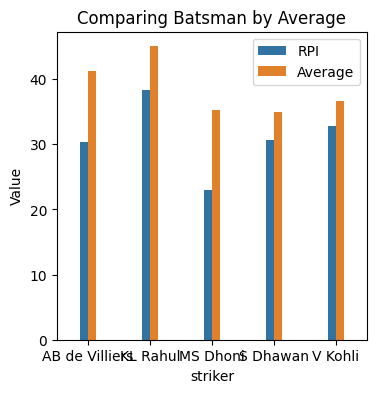

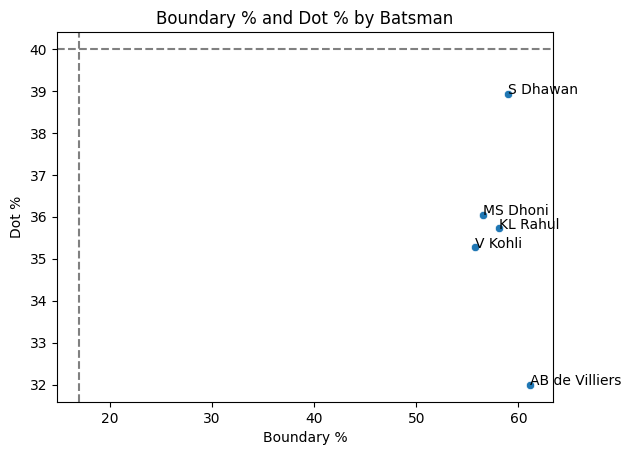

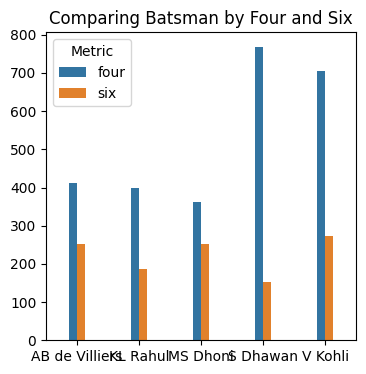

Innings 1
           striker  innings  runs  ball  outs  four  six  dots        RPI    Average  StrikeRate  boundary_%      dot_%
0  AB de Villiers       88  3163  1997    66   254  159   580  35.943182  47.924242  158.387581   62.282643  29.043565
1        KL Rahul       66  2373  1819    56   210   97   672  35.954545  42.375000  130.456295   59.924147  36.943375
2        MS Dhoni      135  3065  2254    88   219  145   797  22.703704  34.829545  135.980479   56.965742  35.359361
3        S Dhawan      127  3926  3177   119   439   92  1224  30.913386  32.991597  123.575700   58.787570  38.526912
4         V Kohli      127  4400  3473   118   362  153  1195  34.645669  37.288136  126.691621   53.772727  34.408293

-----------



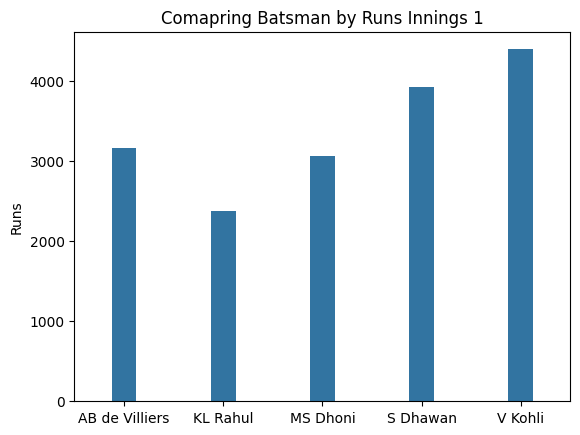

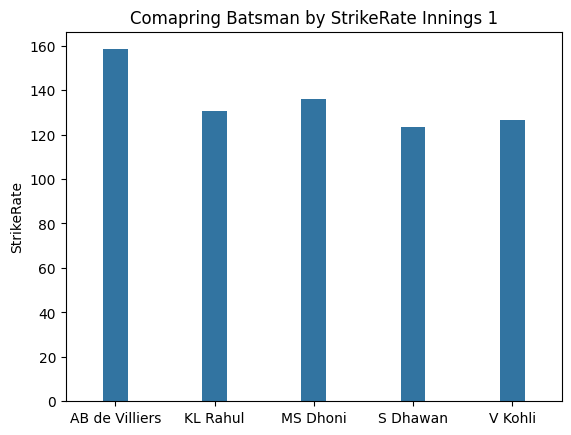

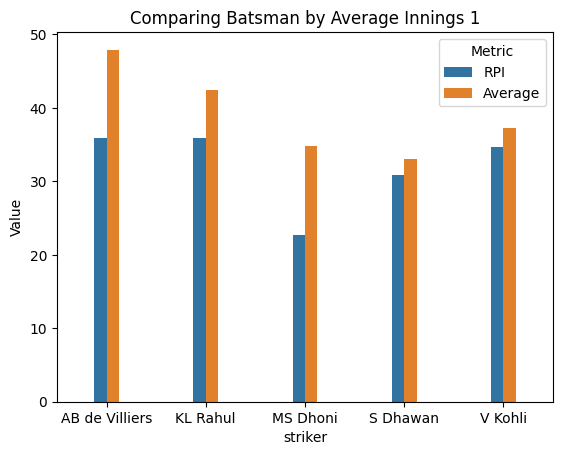

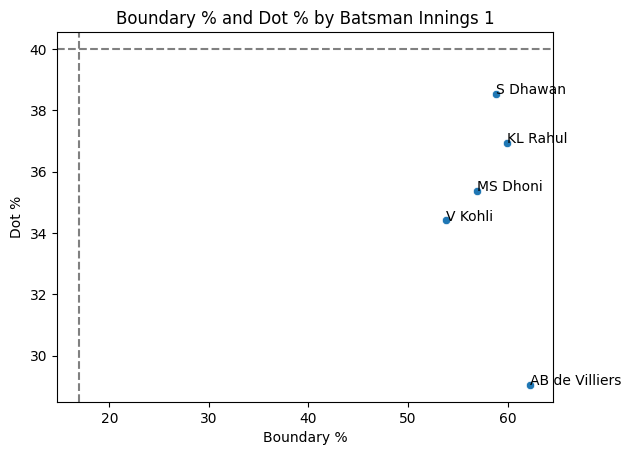

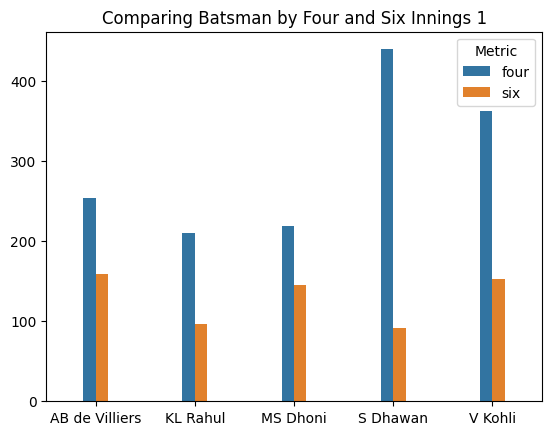

Innings 2
           striker  innings  runs  ball  outs  four  six  dots        RPI    Average  StrikeRate  boundary_%      dot_%
0  AB de Villiers       82  1999  1482    59   159   92   533  24.378049  33.881356  134.885290   59.429715  35.964912
1        KL Rahul       56  2310  1753    48   190   90   604  41.250000  48.125000  131.774102   56.277056  34.455220
2        MS Dhoni       93  2178  1693    61   144  107   626  23.419355  35.704918  128.647372   55.922865  36.975783
3        S Dhawan       94  2843  2304    75   329   61   910  30.244681  37.906667  123.394097   59.162856  39.496528
4         V Kohli      117  3604  2759   100   344  120  1003  30.803419  36.040000  130.627039   58.157603  36.353751

-----------



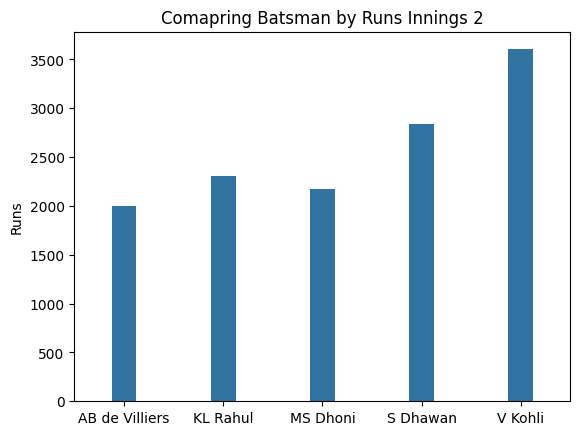

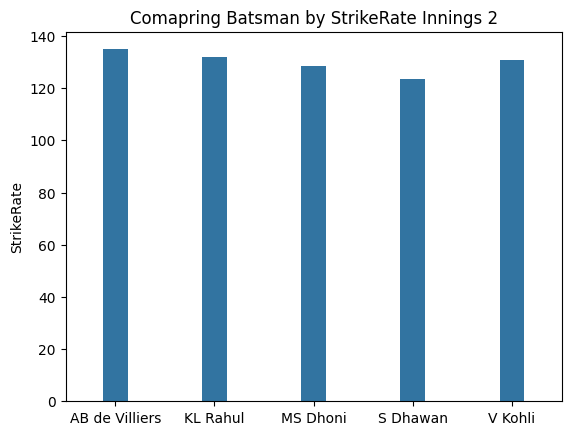

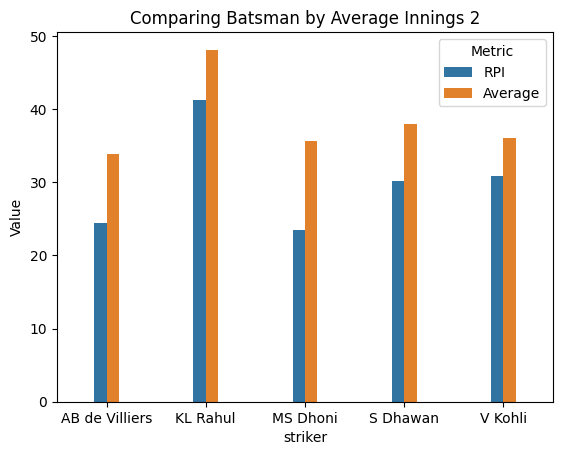

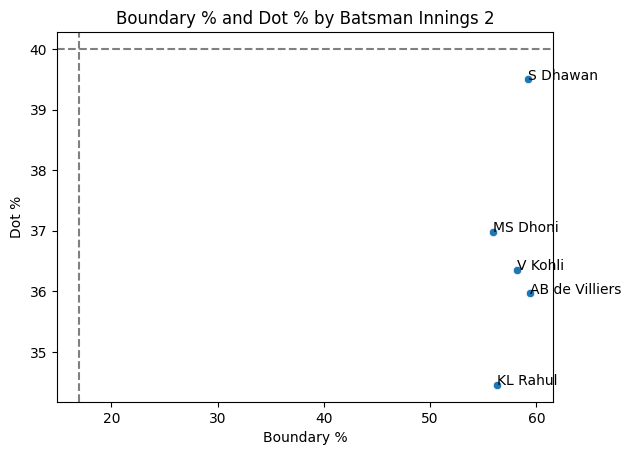

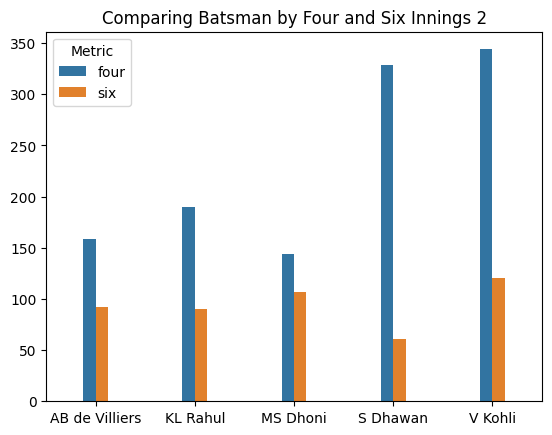

phases
         phase  innings   runs   ball  outs  four  six  dots        RPI    Average  StrikeRate  boundary_%      dot_%
2   powerplay      483   8999   7537   222  1126  239  3497  18.631470  40.536036  119.397638   65.985109  46.397771
1      middle      518  12813  10646   318   911  393  3382  24.735521  40.292453  120.355063   46.843050  31.767800
0  death over      374   8049   4528   250   613  484  1265  21.521390  32.196000  177.760601   66.542428  27.937279

-----------


-----------

InningsPhases First Innings
    innings       phase  no_of_innings  runs  ball  outs  four  six  dots        RPI    Average  StrikeRate  boundary_%      dot_%
2        1   powerplay            291  4767  4132   120   592  119  1938  16.381443  39.725000  115.367861   64.652821  46.902227
1        1      middle            320  7077  5828   166   503  215  1794  22.115625  42.632530  121.431023   46.658188  30.782430
0        1  death over            235  5083  2760   161   389  312   736  21.

In [ ]:
filter_batting_analysis(df,batsman=['MS Dhoni','V Kohli','KL Rahul','AB de Villiers','S Dhawan'])

Overall Batsman Stats
          striker  innings  runs  ball  outs  four  six  dots        RPI    Average  StrikeRate  boundary_%      dot_%
0  AB de Villiers        7    45    43     3     4    0    14   6.428571  15.000000  104.651163   35.555556  32.558140
1        KL Rahul        7    40    47     3     3    0    18   5.714286  13.333333   85.106383   30.000000  38.297872
2        MS Dhoni        8    41    42     2     3    2    22   5.125000  20.500000   97.619048   58.536585  52.380952
3        S Dhawan        7    53    56     4     2    2    21   7.571429  13.250000   94.642857   37.735849  37.500000
4         V Kohli        8    86    69     2     6    2    18  10.750000  43.000000  124.637681   41.860465  26.086957

-----------



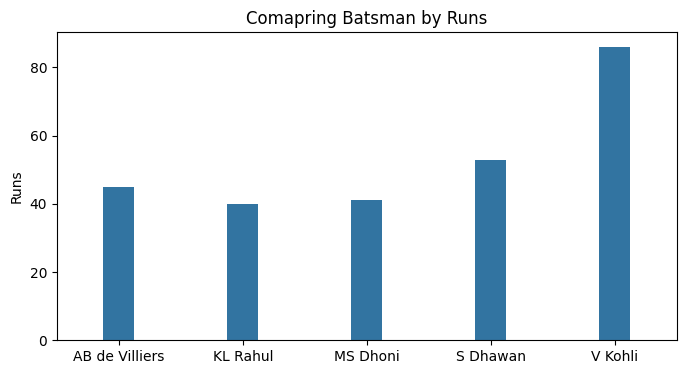

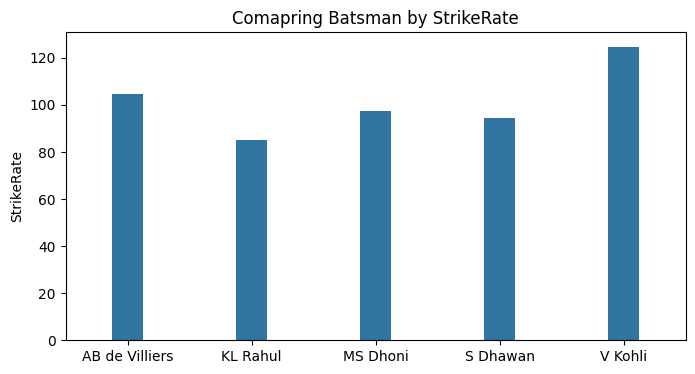

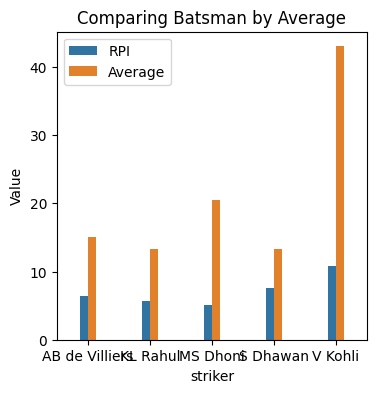

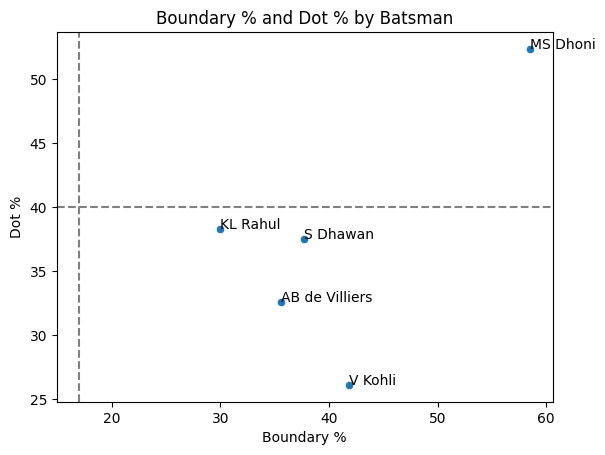

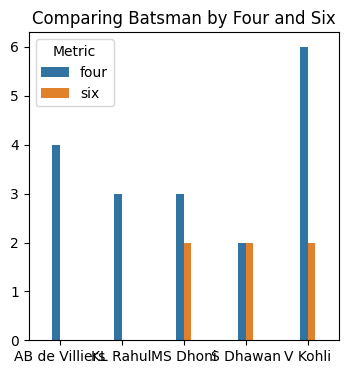

Innings 1
           striker  innings  runs  ball  outs  four  six  dots       RPI  Average  StrikeRate  boundary_%      dot_%
0  AB de Villiers        5    37    35     2     3    0    11  7.400000     18.5  105.714286   32.432432  31.428571
1        KL Rahul        3     8    15     2     0    0     7  2.666667      4.0   53.333333    0.000000  46.666667
2        MS Dhoni        3    11    14     0     1    0     7  3.666667     11.0   78.571429   36.363636  50.000000
3        S Dhawan        3    23    23     2     0    1     7  7.666667     11.5  100.000000   26.086957  30.434783
4         V Kohli        5    38    37     1     2    0     9  7.600000     38.0  102.702703   21.052632  24.324324

-----------



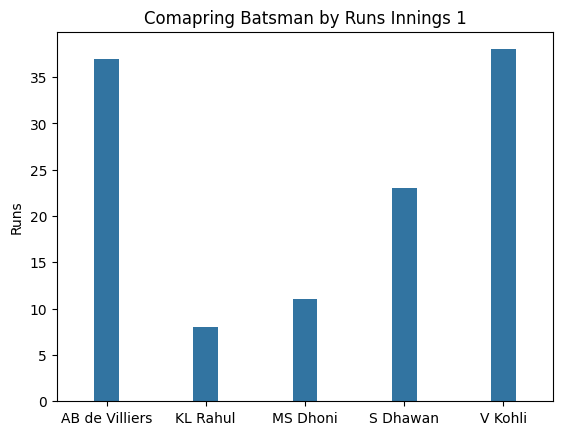

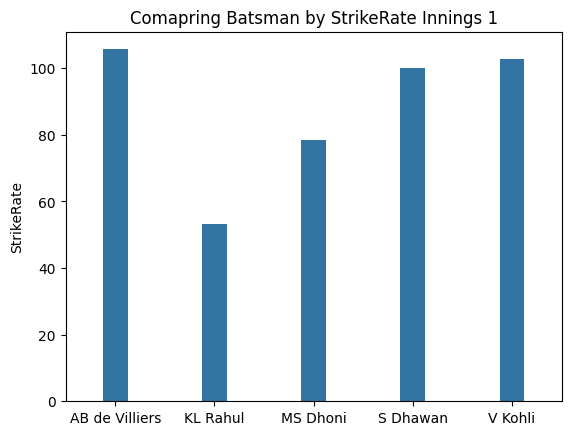

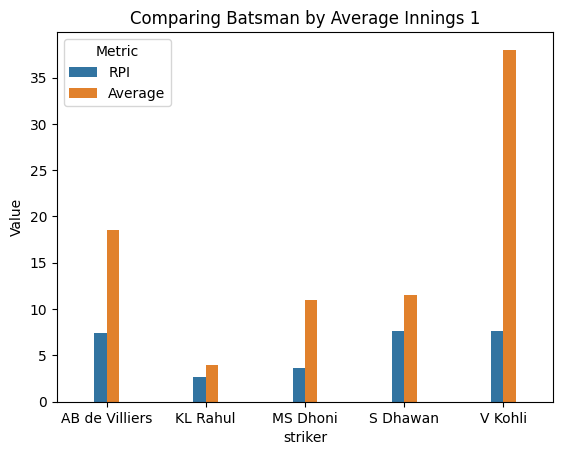

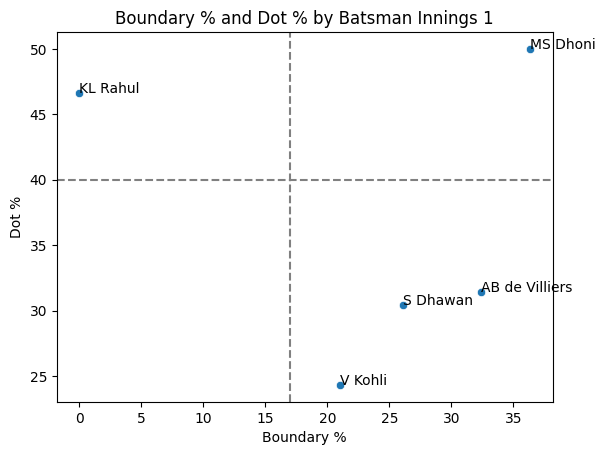

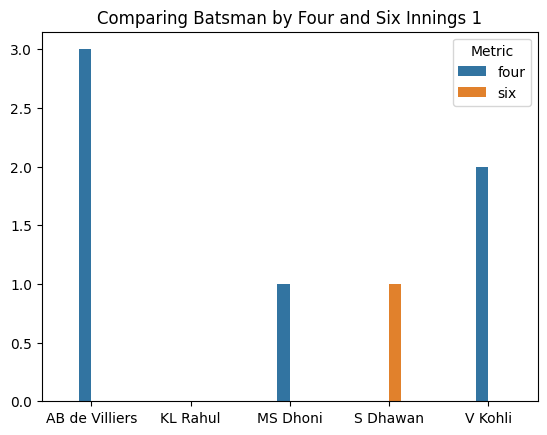

Innings 2
           striker  innings  runs  ball  outs  four  six  dots   RPI  Average  StrikeRate  boundary_%      dot_%
0  AB de Villiers        2     8     8     1     1    0     3   4.0      8.0  100.000000   50.000000  37.500000
1        KL Rahul        4    32    32     1     3    0    11   8.0     32.0  100.000000   37.500000  34.375000
2        MS Dhoni        5    30    28     2     2    2    15   6.0     15.0  107.142857   66.666667  53.571429
3        S Dhawan        4    30    33     2     2    1    14   7.5     15.0   90.909091   46.666667  42.424242
4         V Kohli        3    48    32     1     4    2     9  16.0     48.0  150.000000   58.333333  28.125000

-----------



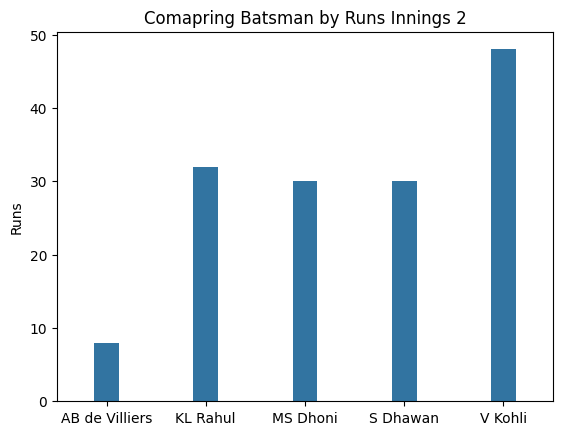

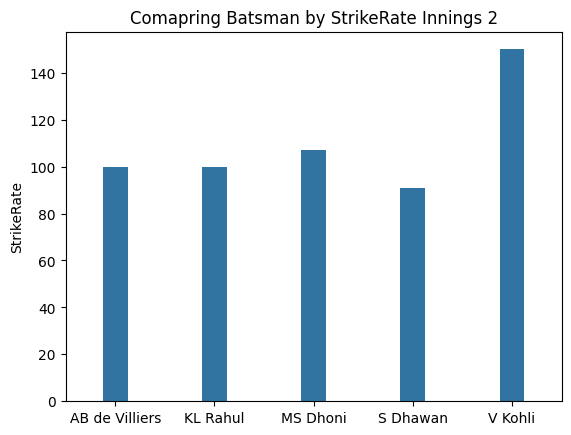

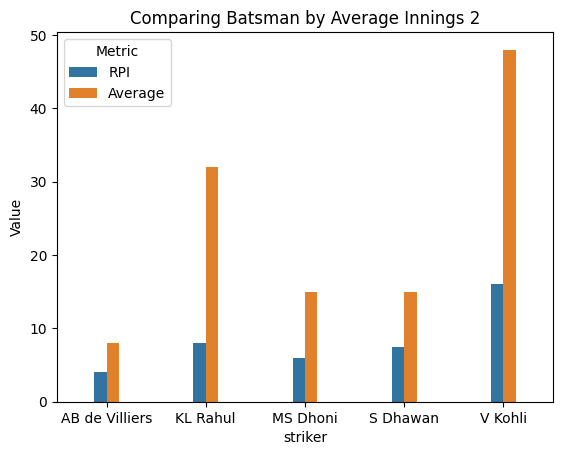

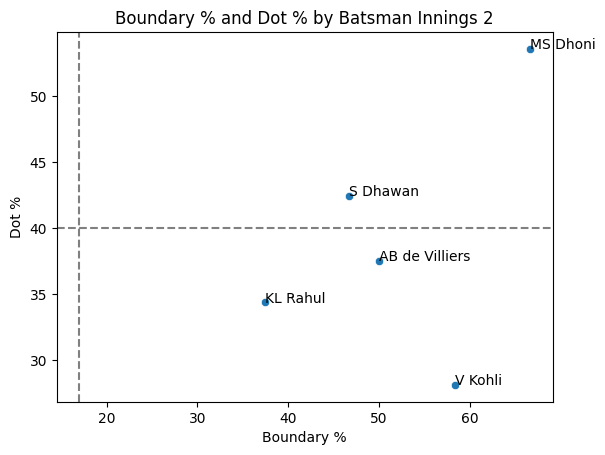

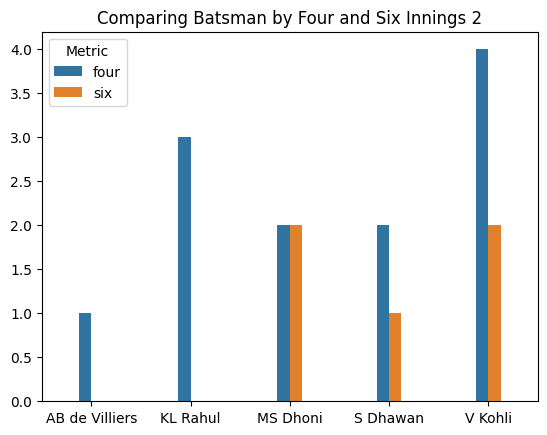

phases
         phase  innings  runs  ball  outs  four  six  dots       RPI    Average  StrikeRate  boundary_%      dot_%
2   powerplay       11    51    39     1     6    1    14  4.636364  51.000000  130.769231   58.823529  35.897436
1      middle       28   158   177    12     8    2    64  5.642857  13.166667   89.265537   27.848101  36.158192
0  death over       11    56    41     1     4    3    15  5.090909  56.000000  136.585366   60.714286  36.585366

-----------


-----------

InningsPhases First Innings
    innings       phase  no_of_innings  runs  ball  outs  four  six  dots       RPI    Average  StrikeRate  boundary_%      dot_%
2        1   powerplay              4    18    17     1     2    0     7  4.500000  18.000000  105.882353   44.444444  41.176471
1        1      middle             14    82    89     6     3    1    28  5.857143  13.666667   92.134831   21.951220  31.460674
0        1  death over              5    17    18     0     1    0     6  3.400000  17.00000

In [26]:
filter_batting_analysis(df,batsman=['MS Dhoni','V Kohli','KL Rahul','AB de Villiers','S Dhawan'],bowler=['Rashid Khan'])